# Integration Work
Transmissions over Integrations

In [1]:
from AD_analysis import *
import Atmospheric_diffraction as atm_shift
import numpy as np
import matplotlib as mpl
import Integ_analysis as int_analysis
import Transmission_calculation as trans_calc

The code mainly draws on the following steps, with key variables described:

>analysis=AD_analysis()

This gets the class

====
>analysis.load_band('LR','NIR','IY','H',sampling=1 * u.nm) 

This function loads the MOSAIC wavelengths that will be used for the shift calculations. 

First variable is LR or HR

Second variable is NIR or VIS

Third/fourth variables are the start/end bands. These can be the same, e.g. 'B', 'B'.

====
>analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])

OR
>analysis.load_airmasses(HA_range=[0,1,2],targ_dec= 0 * u.degree)
This function loads the airmasses to calculate the shifts for.

OR
>analysis.load_airmasses(airmasses=[1,1.1,1.2])

Can use 1) zenith angles (ZA_range)
OR 2) hour angles (HA_range); the declination is -25.3 deg by default, change with targ_dec=X
OR 3) raw airmasses (airmasses)

For integrations, only regularly spaced HA vals in 2) makes physical sense

====
>analysis.calculate_shifts(guide * u.micron, aperture_val * u.micron, centred_on=centre_index,reposition = False, parallatic=True)

This function calculates the shifts for the generated wavelengths and airmasses

guide_waveref is the telescope guide wavelength reference

aperturecentre_waveref is the aperture wavelength reference for original position

centirng_index is at which index of the HA_range we centre the aperture on the aperturecentre_waveref

reposition = TRUE or FALSE is a setting that determines whether the aperture is aligned on the aperture wavelength reference for each sequential airmass
For integrations this needs to be false

parallatic = TRUE or FALSE is whether to use the parallatic angle effect. Should be true for physical observations

====
>analysis.make_aperture(type,method="numerical moffat")

This function generates the aperture to use in the transmission calculations

type can be "hexagons" or "circle" to represent the aperture

method can be 1) analytical gaussian, 2) numerical gaussian, 3) numerical moffat, or 4) numerical durham, and determines how the transmission is calculated

====
>analysis.calculate_transmissions()

This function calculates the transmissions for the shifts using one of several methods

====

These functions can be used in many ways for different plots/analysis of transmissions/shifts

Most of these function have other optional variables, e.g., scale for the numerical simulations, whether to change FWHM with airmass and wavelength. These are described in the relevant function notes

# Integration Transmission Graphs

## Transmission vs Wavelength for various aperture centres

In [2]:
#Following function plots integration transmission average for single mode observations
def plot_integ_trans(analysis,guide,aperture_centres,parallatic=True,normalise="no AD",centring="mid HA"):  
    """
    normalise: string, "none", "no ad"
        what to normalise the transmission to; either no normalisation, or relative to the no AD case (perfect ADC)

    """
    weights = np.arange(0, len(aperture_centres)+1)
    norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_centres,guide,parallatic,centring)
    
    plt.figure(figsize=[7,5])
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_centres[count]),color=cmap.to_rgba(len(aperture_centres)-count))
        plt.ylabel("Mean Transmission")        
        plt.plot(analysis.output['wavelengths'],opt_transmission,label='No AD Transmission',color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_centres[count]),color=cmap.to_rgba(len(aperture_centres)-count))
        plt.axhline(y=1,label='No AD Transmission, {}'.format(analysis.input['method']),color='black',linestyle='--')
        plt.ylabel("Mean Transmission Relative to No AD")
        
    plt.legend()   
    plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Centre at {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))
    plt.ylim(0,1.1)
    plt.xlabel("Wavelength (nm)")

Target goes below Horizon above/below HA of +/- 8.2h
Target goes below Horizon above/below HA of +/- 8.2h
Target goes below Horizon above/below HA of +/- 8.2h
Target goes below Horizon above/below HA of +/- 8.2h


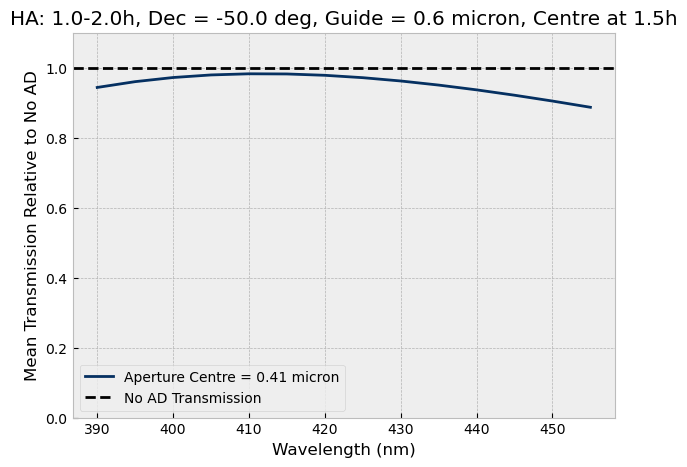

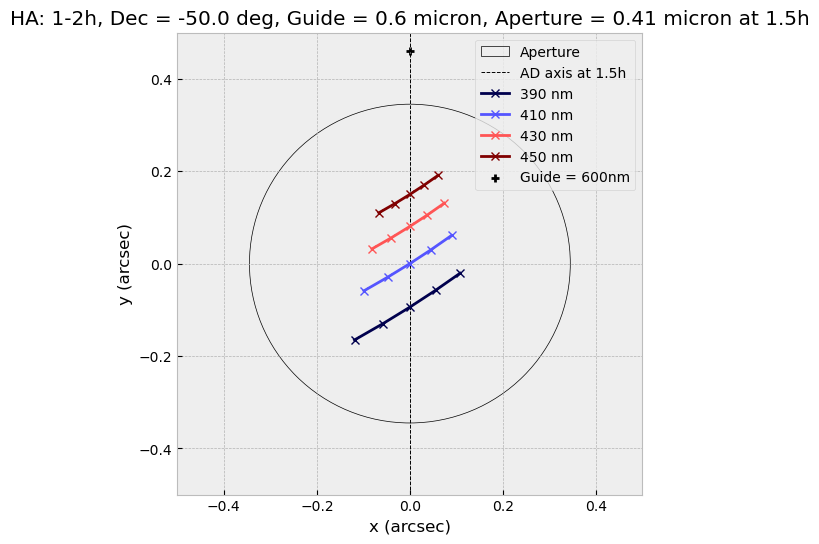

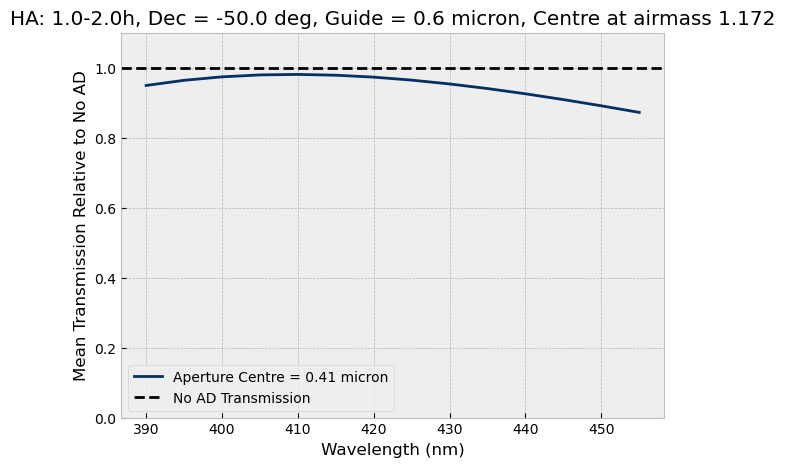

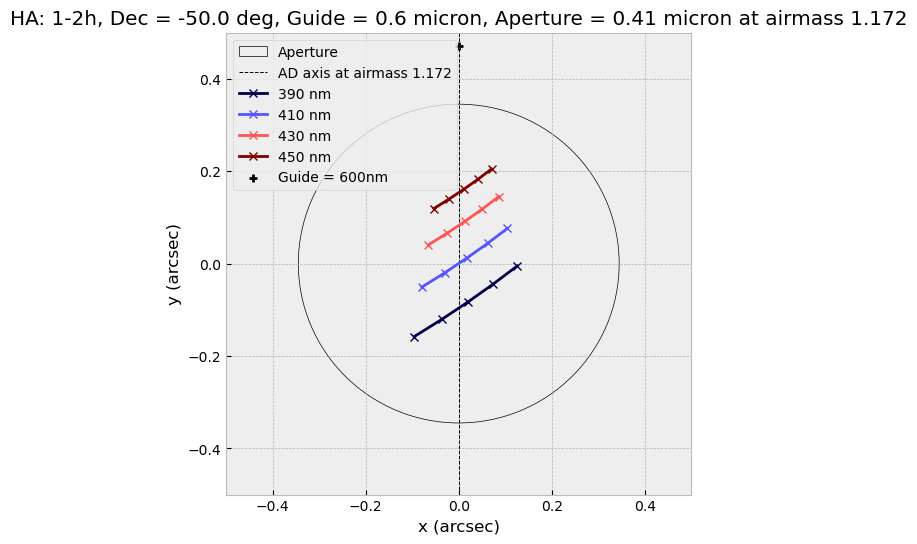

In [3]:
#Following is what is needed to plot the Trans vs Wavelength graphs for various aperture centres
#VIS
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=5*u.nm) #Change for wanted observing mode

#HA:
targ_dec=-50*u.deg
analysis.load_airmasses(HA_range=np.linspace(1,2,21),targ_dec=targ_dec)

#Aperture values to use:
aperture_centres=[.41]*u.micron

#Need to generate the apertures
analysis.make_aperture("hexagons",method="numerical moffat")

#Guide in NIR:
guide=.6 * u.micron

#Function generates shifts and transmissions, and creates a plot for the WL vs Trans described above
plot_integ_trans(analysis,guide,aperture_centres,centring="mid HA")

#Following set of functions do the same but create a track plot
#load_band, and load_airmasses are repeated as we most likely want a plot with less information (lower sampling and less HA values)
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=[1,1.25,1.5,1.75,2],targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_centres[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

#Following is what is needed to plot the Trans vs Wavelength graphs for various aperture centres
#VIS
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=5*u.nm) #Change for wanted observing mode

#HA:
targ_dec=-50*u.deg
analysis.load_airmasses(HA_range=np.linspace(1,2,21),targ_dec=targ_dec)

#Aperture values to use:
aperture_centres=[.41]*u.micron

#Need to generate the apertures
analysis.make_aperture("hexagons",method="numerical moffat")

#Guide in NIR:
guide=.6 * u.micron

#Function generates shifts and transmissions, and creates a plot for the WL vs Trans described above
plot_integ_trans(analysis,guide,aperture_centres,centring="mid airmass")

#Following set of functions do the same but create a track plot
#load_band, and load_airmasses are repeated as we most likely want a plot with less information (lower sampling and less HA values)
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=[1,1.25,1.5,1.75,2],targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_centres[0],centring="mid airmass")
int_analysis.track_plot(analysis,y_axis="centring")

## Parallel Mode Graph

In [17]:
#Following function plots integration transmission average for parallel observations
def plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,normalise="no AD",method="numerical moffat",aperture="circle",sample_val=[1*u.nm,1*u.nm],scale_val=0.01,parallatic=True,centring="mid HA"):  
    weights_r = np.arange(0, len(aperture_NIR)+2)
    norm_r = mpl.colors.Normalize(vmin=min(weights_r), vmax=max(weights_r))
    cmap_red = mpl.cm.ScalarMappable(norm=norm_r, cmap=mpl.cm.Purples)
    weights_b = np.arange(0, len(aperture_B)+2)
    norm_b = mpl.colors.Normalize(vmin=min(weights_b), vmax=max(weights_b))
    cmap_blue = mpl.cm.ScalarMappable(norm=norm_b, cmap=mpl.cm.Blues)
    weights_g = np.arange(0, len(aperture_V)+2)
    norm_g = mpl.colors.Normalize(vmin=min(weights_g), vmax=max(weights_g))
    cmap_green = mpl.cm.ScalarMappable(norm=norm_g, cmap=mpl.cm.Greens)
    weights_vr = np.arange(0, len(aperture_R)+2)
    norm_vr = mpl.colors.Normalize(vmin=min(weights_vr), vmax=max(weights_vr))
    cmap_vr = mpl.cm.ScalarMappable(norm=norm_vr, cmap=mpl.cm.Reds)
       
    analysis.load_band("LR","VIS","B","B",sampling=sample_val[0])
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_B,guide,parallatic,centring)

    plt.figure(figsize=[7,5])
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_B[count]),color=cmap_blue.to_rgba(len(aperture_B)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
        
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_B[count]),color=cmap_blue.to_rgba(len(aperture_B)-count))

    analysis.load_band("LR","VIS","V","V",sampling=sample_val[0])
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_V,guide,parallatic,centring)
    
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_V[count]),color=cmap_green.to_rgba(len(aperture_V)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
        
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_V[count]),color=cmap_green.to_rgba(len(aperture_V)-count))
            
    analysis.load_band("LR","VIS","R","R",sampling=sample_val[0])
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_R,guide,parallatic,centring)

    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_R[count]),color=cmap_vr.to_rgba(len(aperture_R)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
        
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_R[count]),color=cmap_vr.to_rgba(len(aperture_R)-count))

    analysis.load_band("LR","NIR","IY","H",sampling=sample_val[1])
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_NIR,guide,parallatic,centring)

    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_NIR[count]),color=cmap_red.to_rgba(len(aperture_NIR)-count))
        plt.ylabel("Mean Transmission")        
        plt.plot(analysis.output['wavelengths'],opt_transmission,label='No AD Transmission',color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_NIR[count]),color=cmap_red.to_rgba(len(aperture_NIR)-count))
        plt.axhline(y=1,label='No AD Transmission, {}'.format(analysis.input['method']),color='black',linestyle='--')
        plt.ylabel("Mean Transmission Relative to No AD")
        
    plt.ylim(0,1.1)
    plt.xlabel("Wavelength (nm)")
    plt.axvline(x=guide.value*1000,color='black',linewidth=0.7,label='Guide Wavelength')
    #if analysis.input['HA_range'] != []:
        #plt.title("Guide = {}, HA {}-{}, Dec = {}, Centre at = {}h".format(guide,analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],analysis.input['HA_range'][analysis.input['centred_on']]))
    plt.legend()

Target goes below Horizon above/below HA of +/- 6.0h


Text(0.5, 1.0, 'HA: 1.0-2.0h, Dec = 0.0 deg, Guide = 0.6 micron, Centre at 1.0h')

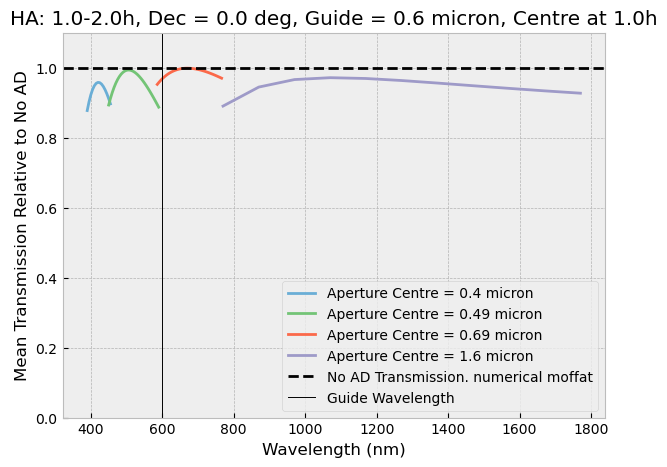

In [18]:
#To plot parallel graphs, it is much more compact as a function takes care of the bands.
analysis=AD_analysis()
#Change values below for different parallel observing cases
HA_range=np.linspace(1,2,21)
targ_dec=0*u.deg
centring=0
aperture_B=[.4]*u.micron
aperture_V=[.49]*u.micron
aperture_R=[.69]*u.micron
aperture_NIR=[1.6]*u.micron
guide=.6*u.micron

#Desired airmasses
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
#Calculates shifts/transmissions/mean transmission and plots
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Centre at {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))


Target goes below Horizon above/below HA of +/- 6.0h


Text(0.5, 1.0, 'HA: 1.0-2.0h, Dec = 0.0 deg, Guide = 0.6 micron, Centre at 1.5h')

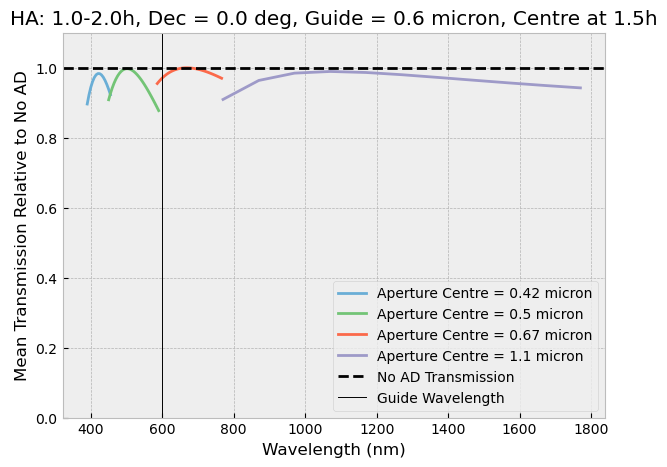

In [6]:
#This one centres at the tenth HA_range/airmass index, i.e. HA = 1.5h
analysis=AD_analysis()
HA_range=np.linspace(1,2,21)
targ_dec=0*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.50]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron

#Desired airmasses
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
#Calculates shifts/transmissions/mean transmission and plots
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Centre at {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))


Target goes below Horizon above/below HA of +/- 6.0h
Target goes below Horizon above/below HA of +/- 6.0h
Target goes below Horizon above/below HA of +/- 6.0h
Target goes below Horizon above/below HA of +/- 6.0h


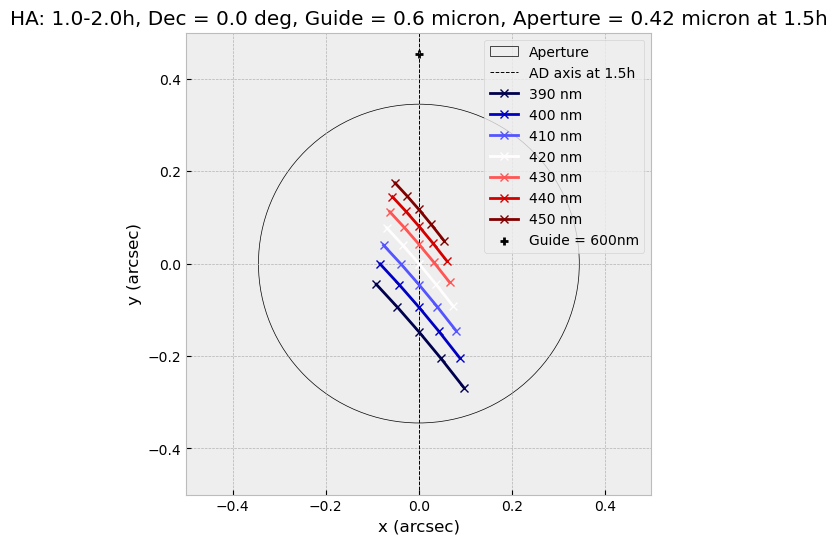

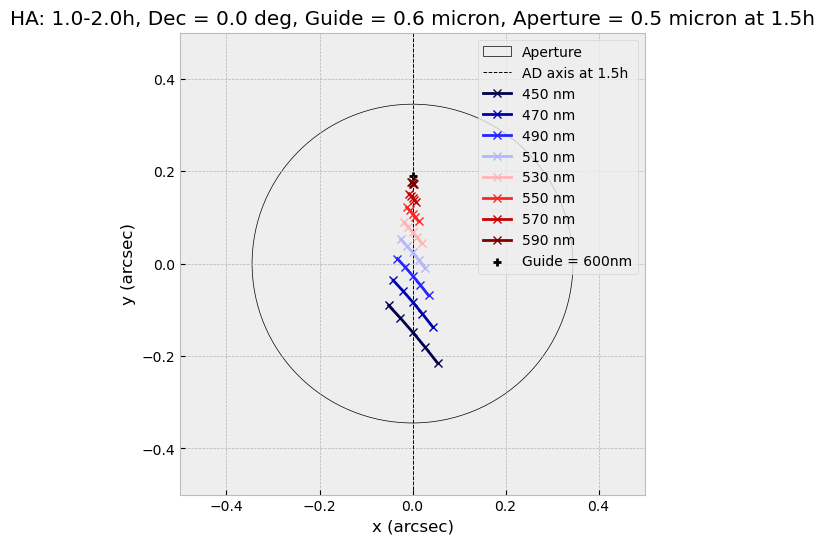

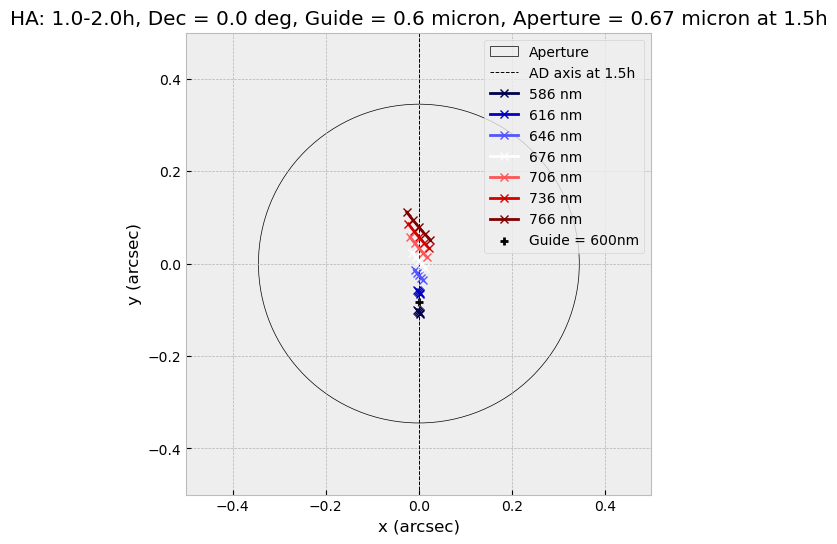

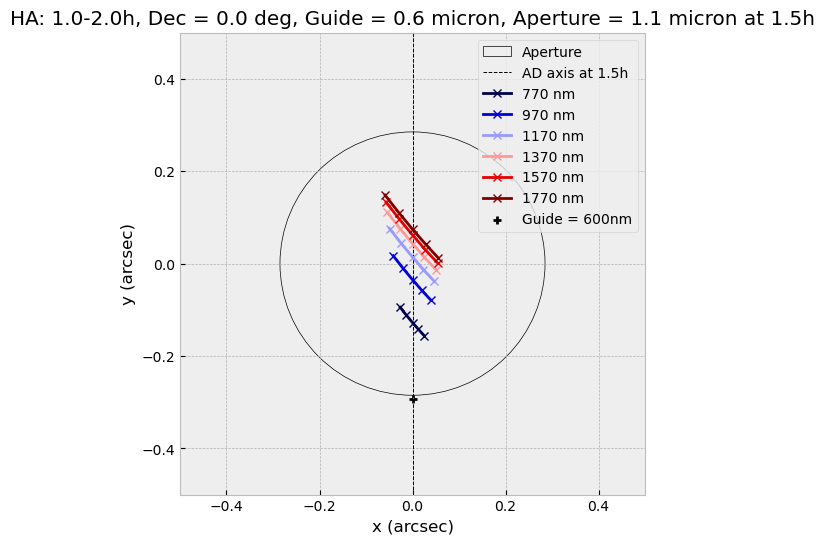

In [7]:
#Corresponding track plots to above graph. Number of HA values, and so centred_on, and sampling has changed to reduce information on the plot.
#Two options for y-axis: "centring", which is +y axis is along centring index dispersion direction, or "PA" where +y axis is PA=0
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

# Various Cosmo Fields

## GOODS-S

Target goes below Horizon above/below HA of +/- 6.9h
Target goes below Horizon above/below HA of +/- 6.9h
Target goes below Horizon above/below HA of +/- 6.9h
Target goes below Horizon above/below HA of +/- 6.9h
Target goes below Horizon above/below HA of +/- 6.9h


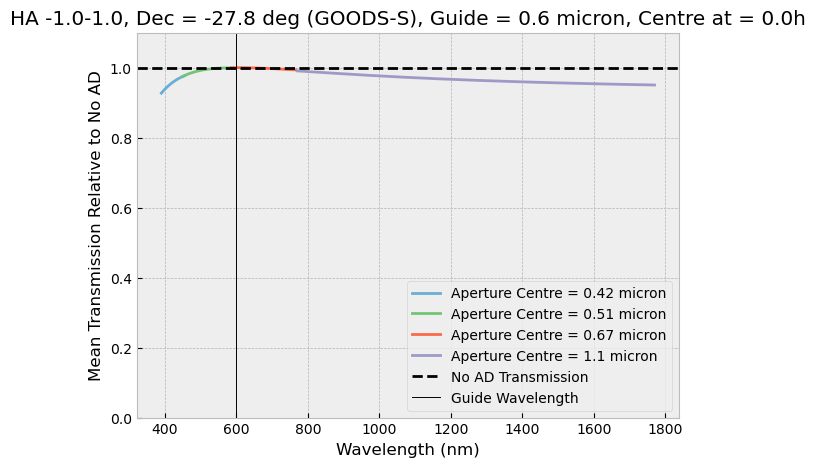

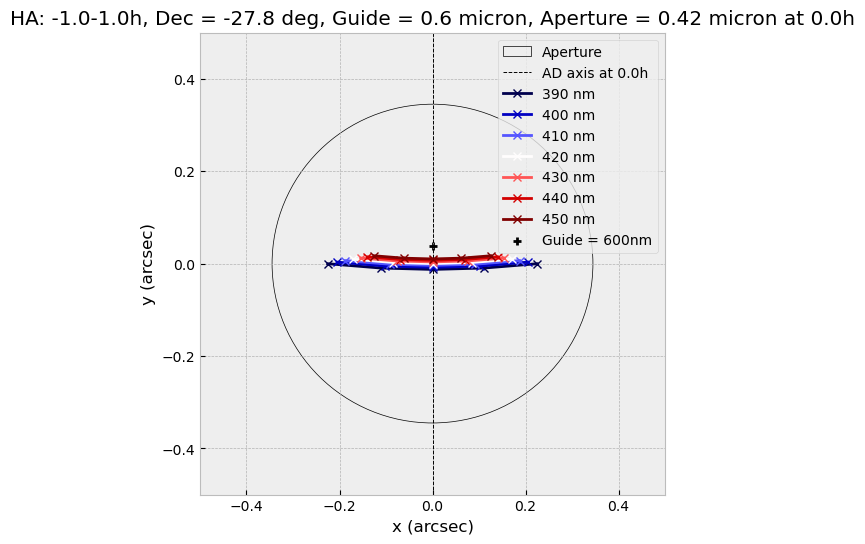

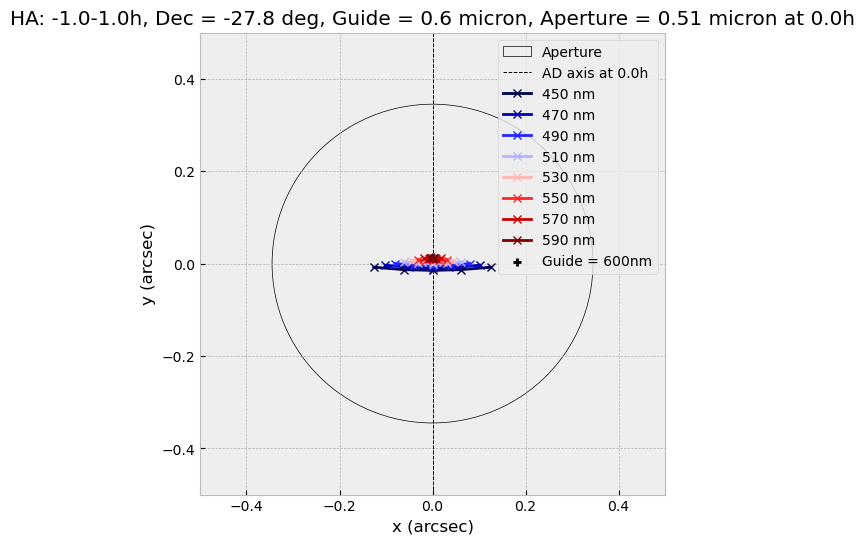

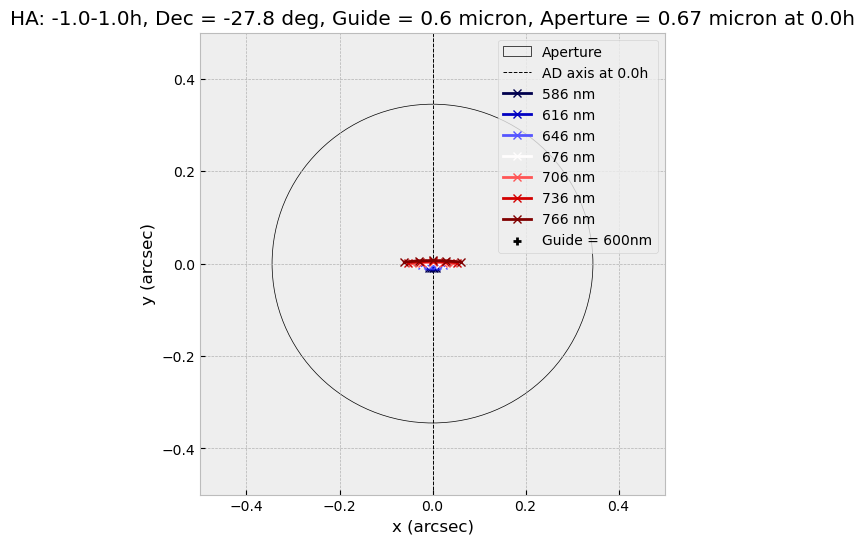

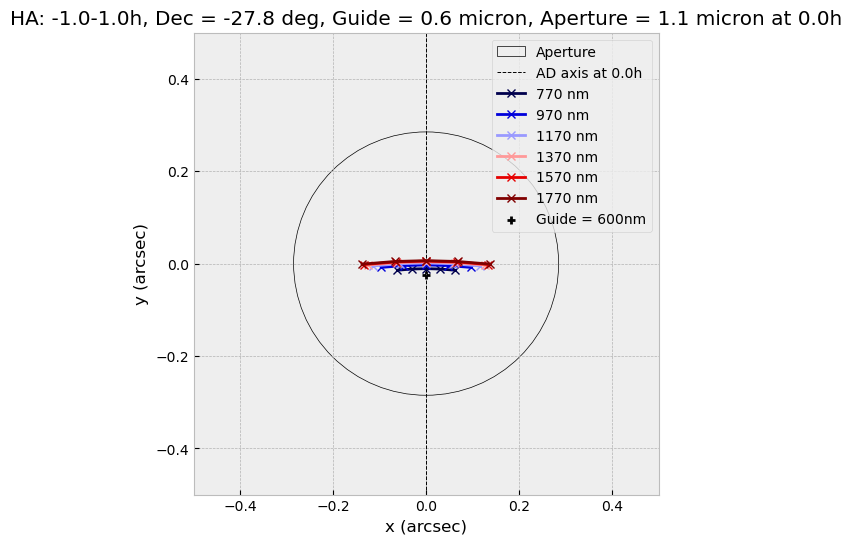

In [8]:
#This one centres at the tenth HA_range/airmass index, i.e. HA = 1.5h
analysis=AD_analysis()
HA_range=np.linspace(-1,1,21)
targ_dec=-27.8*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron

#Desired airmasses
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
#Calculates shifts/transmissions/mean transmission and plots
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA {}-{}, Dec = {} (GOODS-S), Guide = {}, Centre at = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

#Corresponding track plots to above graph. Number of HA values, and so centred_on, and sampling has changed to reduce information on the plot.
#Two options for y-axis: "centring", which is +y axis is along centring index dispersion direction, or "PA" where +y axis is PA=0
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

## COSMOS

Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h


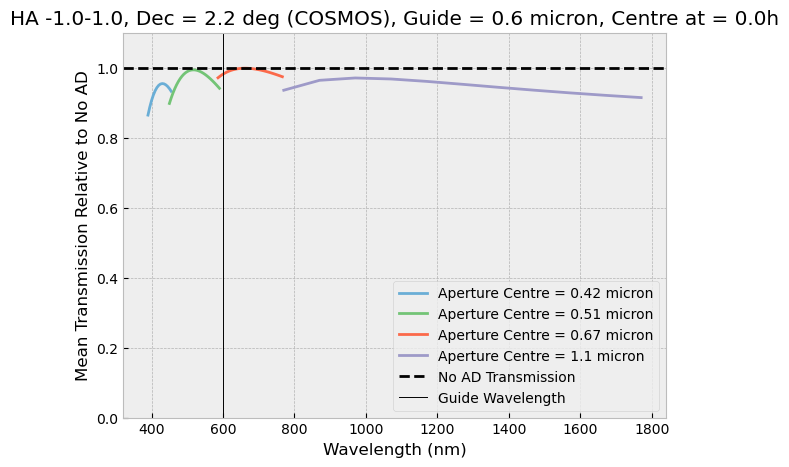

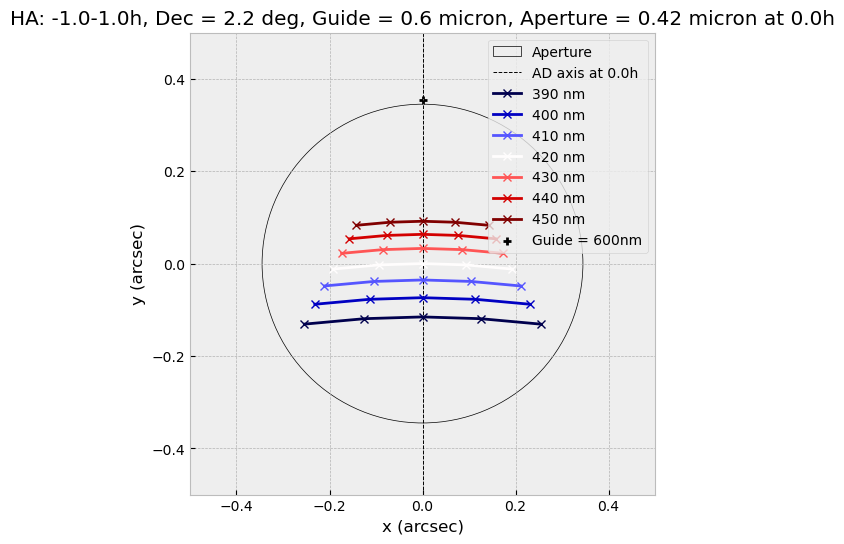

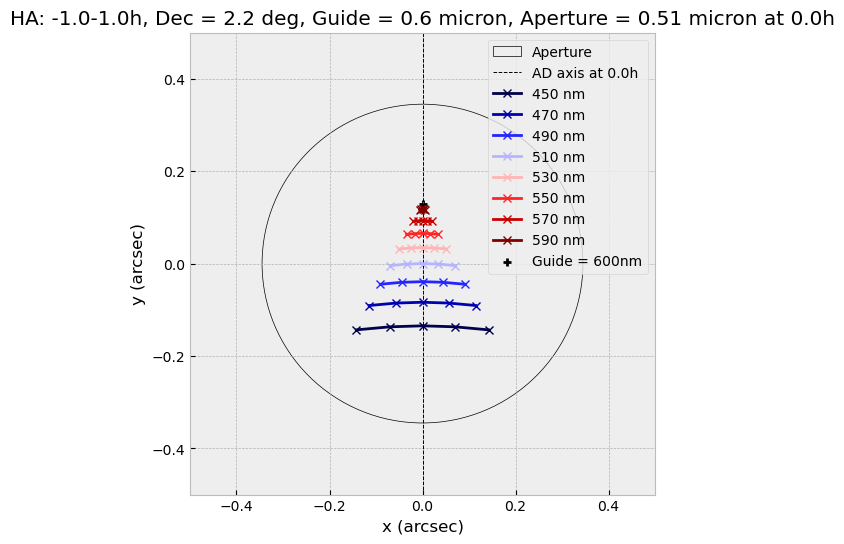

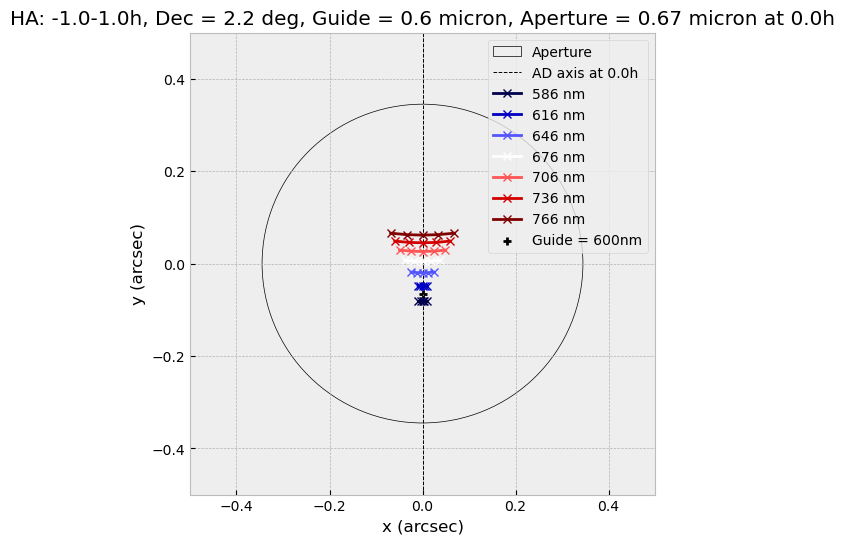

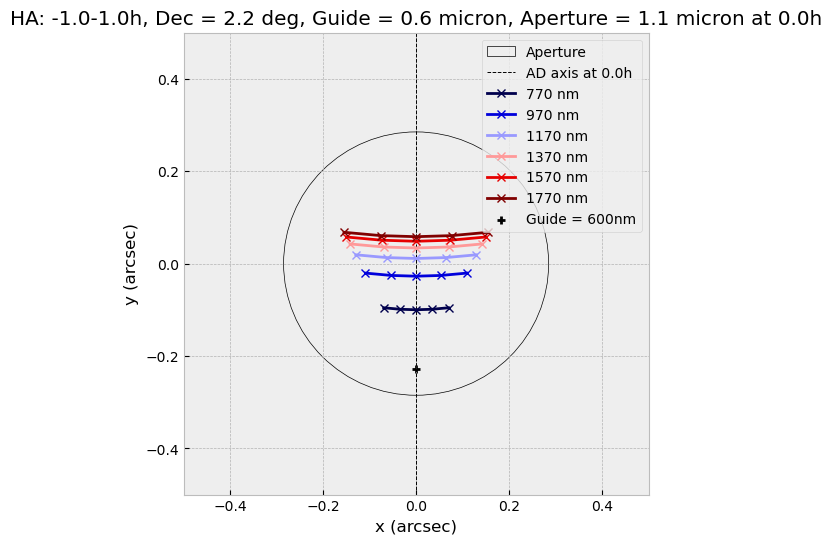

In [9]:
#This one centres at the tenth HA_range/airmass index, i.e. HA = 1.5h
analysis=AD_analysis()
HA_range=np.linspace(-1,1,21)
targ_dec=2.2*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron

#Desired airmasses
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
#Calculates shifts/transmissions/mean transmission and plots
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA {}-{}, Dec = {} (COSMOS), Guide = {}, Centre at = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

#Corresponding track plots to above graph. Number of HA values, and so centred_on, and sampling has changed to reduce information on the plot.
#Two options for y-axis: "centring", which is +y axis is along centring index dispersion direction, or "PA" where +y axis is PA=0
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

## UDS

Target goes below Horizon above/below HA of +/- 6.2h
Target goes below Horizon above/below HA of +/- 6.2h
Target goes below Horizon above/below HA of +/- 6.2h
Target goes below Horizon above/below HA of +/- 6.2h
Target goes below Horizon above/below HA of +/- 6.2h


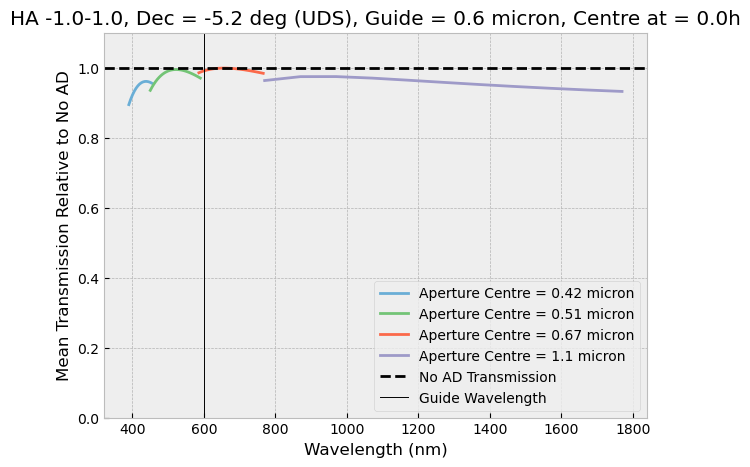

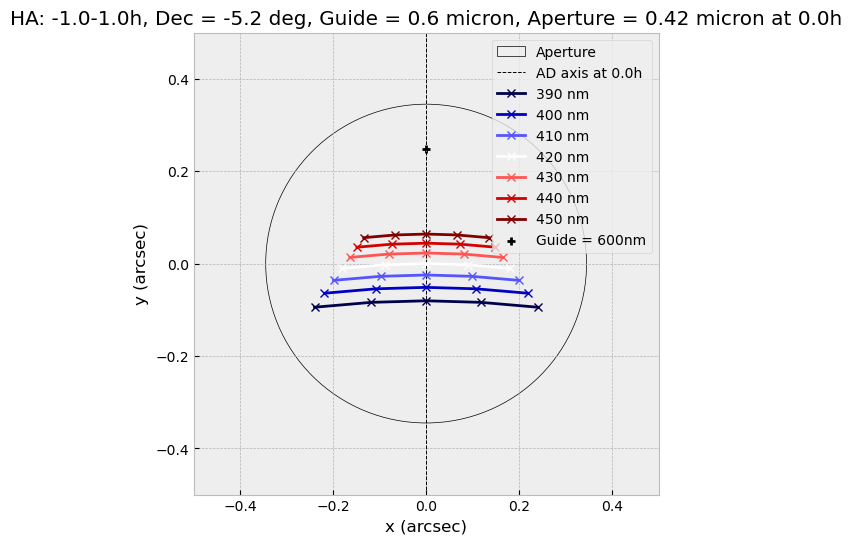

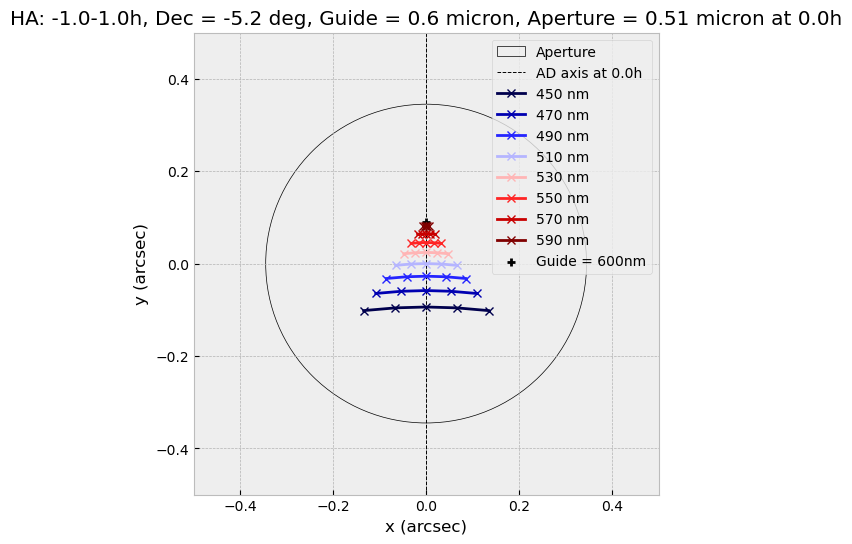

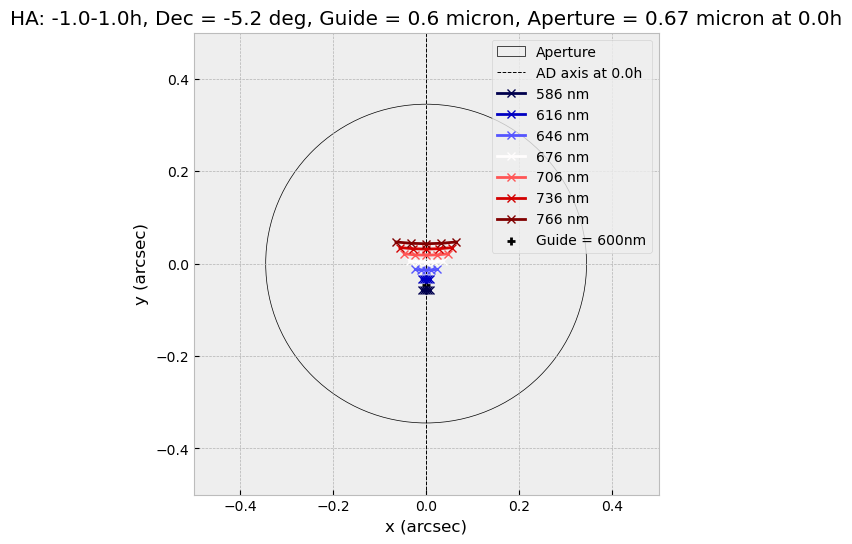

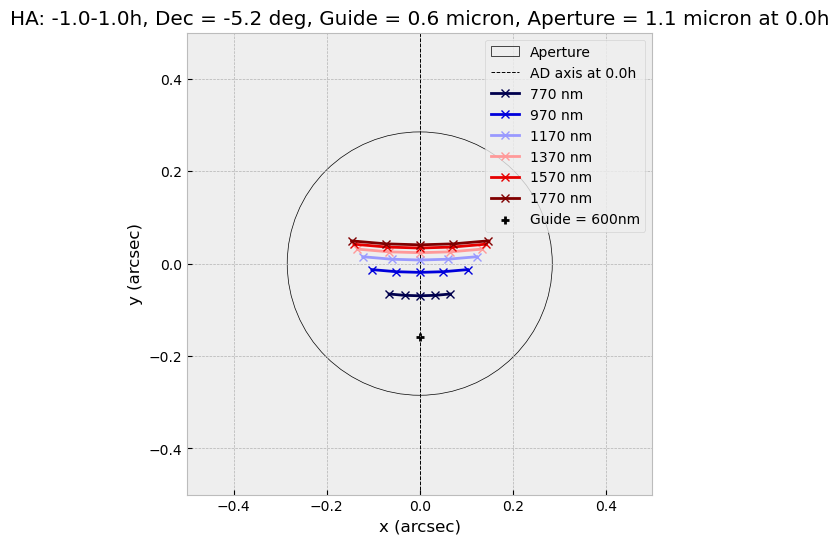

In [10]:
#This one centres at the tenth HA_range/airmass index, i.e. HA = 1.5h
analysis=AD_analysis()
HA_range=np.linspace(-1,1,21)
targ_dec=-5.2*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron

#Desired airmasses
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
#Calculates shifts/transmissions/mean transmission and plots
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA {}-{}, Dec = {} (UDS), Guide = {}, Centre at = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

#Corresponding track plots to above graph. Number of HA values, and so centred_on, and sampling has changed to reduce information on the plot.
#Two options for y-axis: "centring", which is +y axis is along centring index dispersion direction, or "PA" where +y axis is PA=0
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

## SMC

/Users/Jay.Stephan/Library/CloudStorage/OneDrive-ScienceandTechnologyFacilitiesCouncil/Documents/Work/MOSAIC/AD/AD-Code/Main-Version/AD_analysis.py:147: RuntimeWarning: invalid value encountered in arccos
  LHA_below_horizon=np.rad2deg(np.arccos(-np.tan(lat)*np.tan(dec)))/15


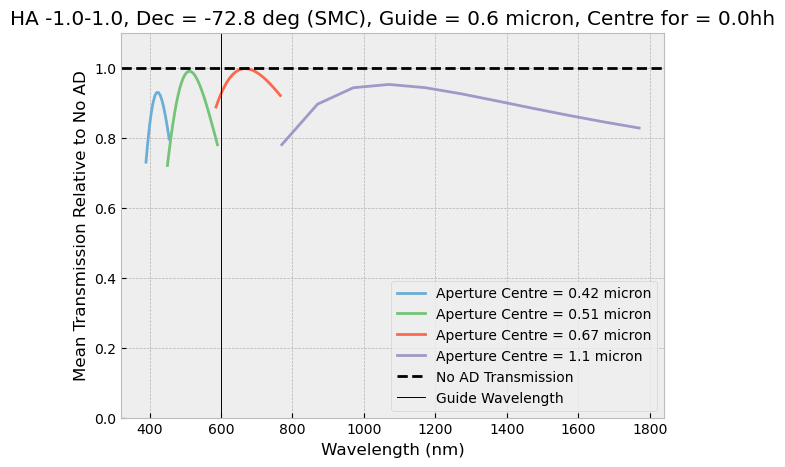

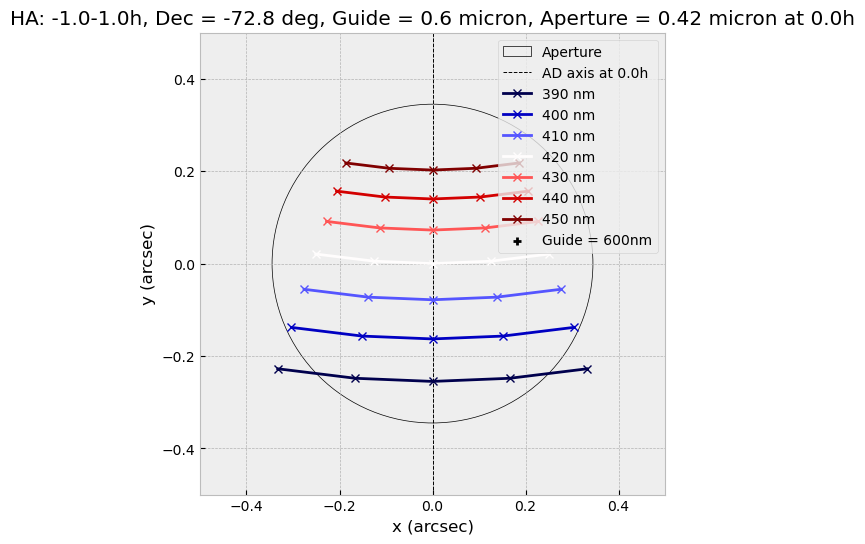

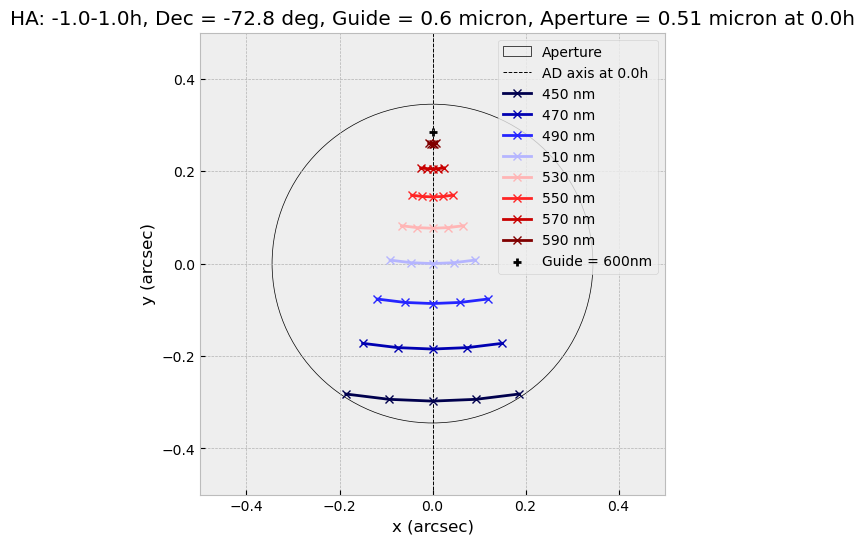

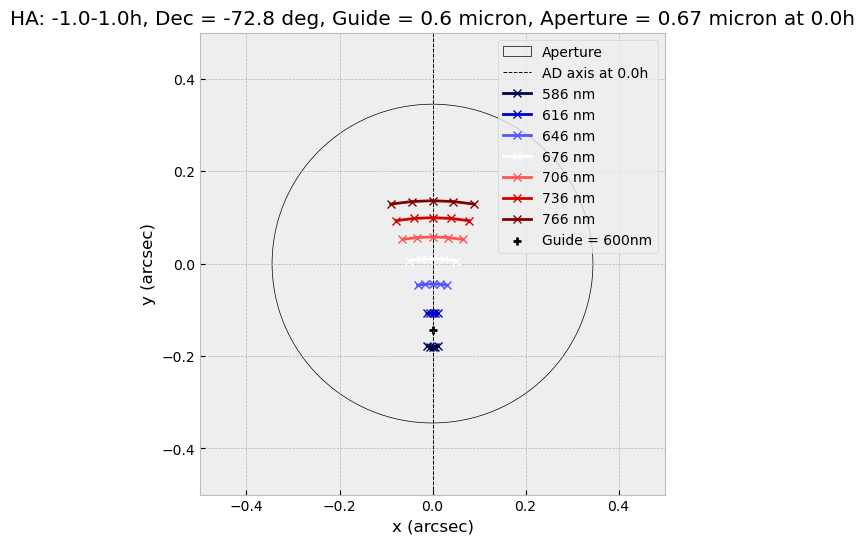

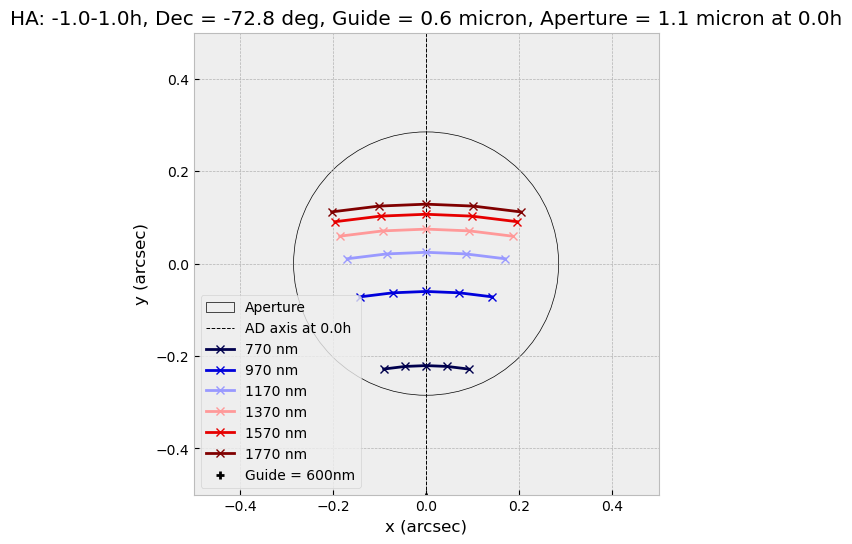

In [12]:
#This one centres at the tenth HA_range/airmass index, i.e. HA = 1.5h
analysis=AD_analysis()
HA_range=np.linspace(-1,1,21)
targ_dec=-72.8*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron

#Desired airmasses
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
#Calculates shifts/transmissions/mean transmission and plots
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA {}-{}, Dec = {} (SMC), Guide = {}, Centre at = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

#Corresponding track plots to above graph. Number of HA values, and so centred_on, and sampling has changed to reduce information on the plot.
#Two options for y-axis: "centring", which is +y axis is along centring index dispersion direction, or "PA" where +y axis is PA=0
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

## LMC

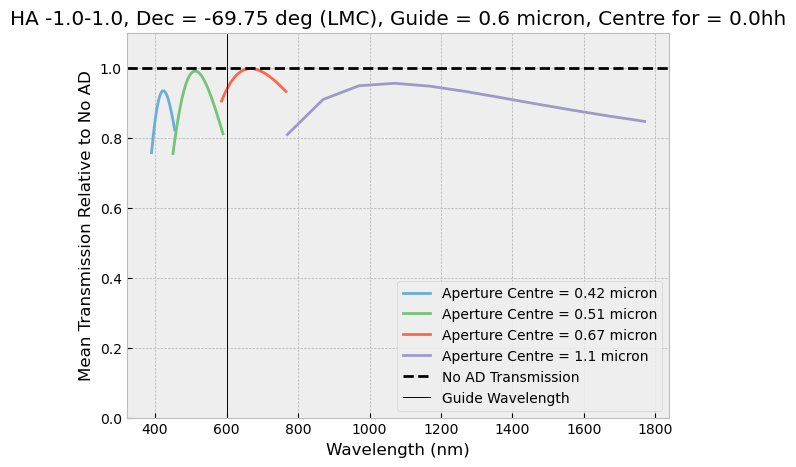

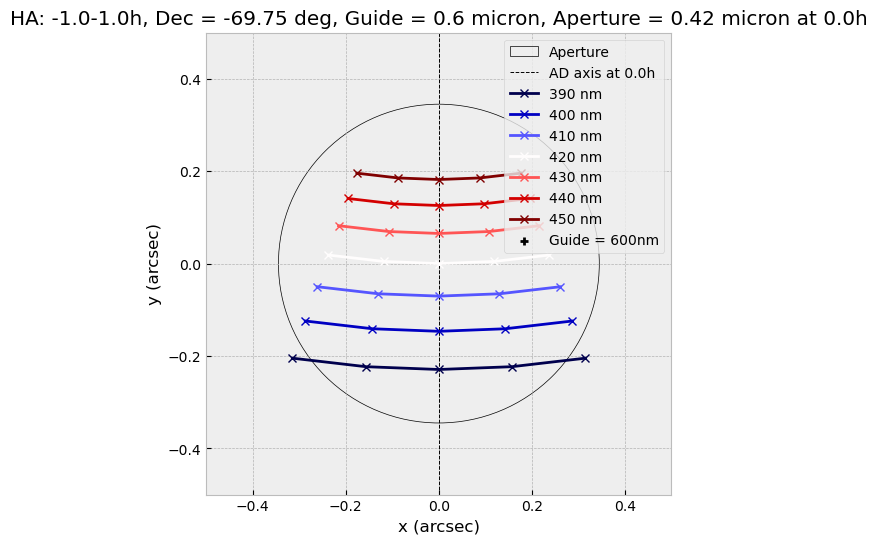

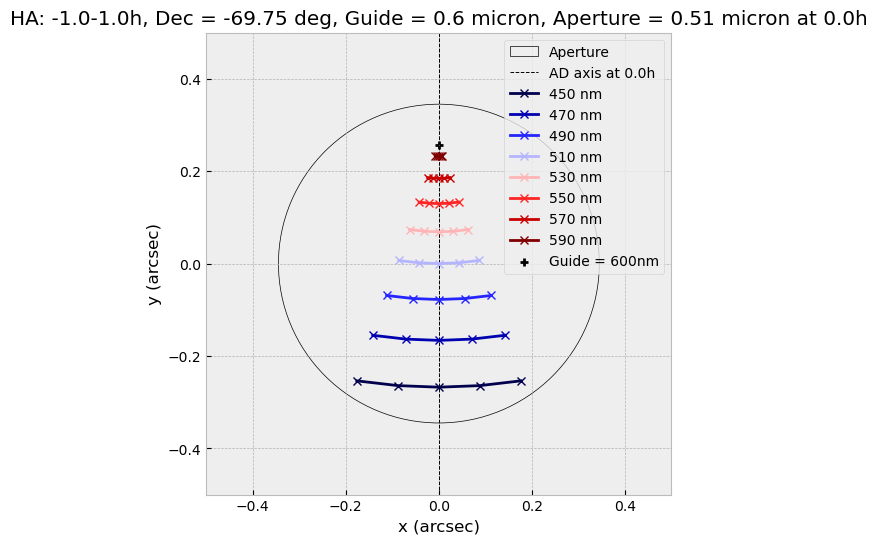

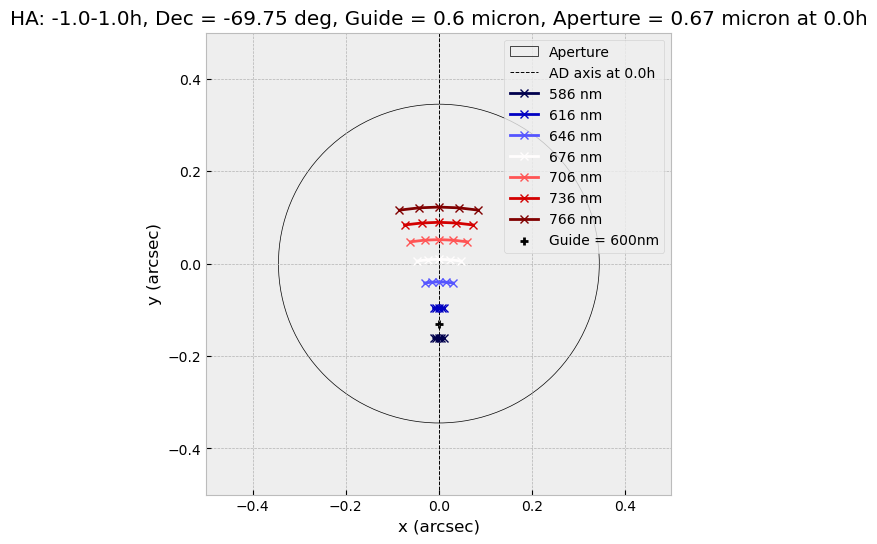

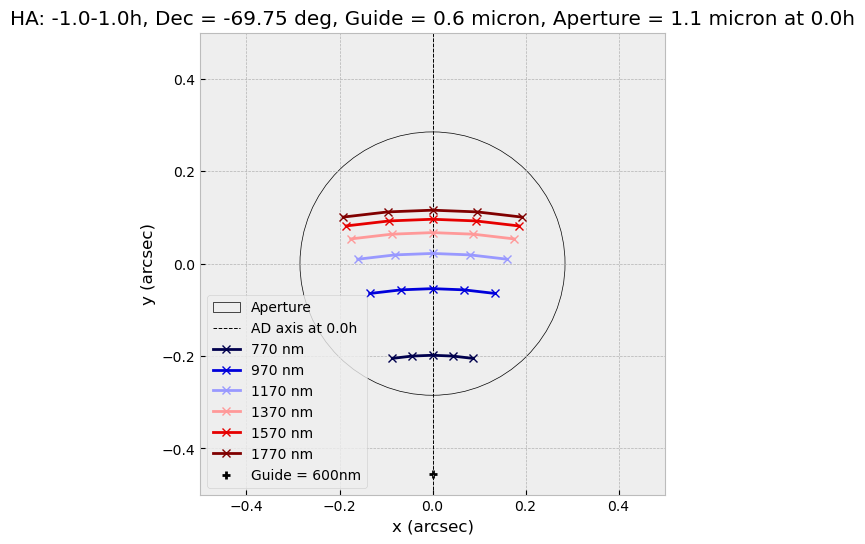

In [16]:
#This one centres at the tenth HA_range/airmass index, i.e. HA = 1.5h
analysis=AD_analysis()
HA_range=np.linspace(-1,1,21)
targ_dec=-69.75*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron

#Desired airmasses
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
#Calculates shifts/transmissions/mean transmission and plots
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA {}-{}, Dec = {} (LMC), Guide = {}, Centre at = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

#Corresponding track plots to above graph. Number of HA values, and so centred_on, and sampling has changed to reduce information on the plot.
#Two options for y-axis: "centring", which is +y axis is along centring index dispersion direction, or "PA" where +y axis is PA=0
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

# Optimisation

In [14]:
aperture_centres=[0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]*u.micron
guide=[1.4]*u.micron
def optimise_aperture(guide,aperture_centres_options,band,metric="min trans", sampling = 1*u.nm):
    
    analysis.load_band(band[0],band[1],band[2],band[3],sampling=sampling)
     
    best_metric=0
    best_guide=0
    best_aperture=0

    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_centres_options,guide,parallatic=True)
    for count,i in enumerate(integ_transmissions):
        current_metric=int_analysis.integ_metric(np.array(i)/np.array(opt_transmission),metric)
        if current_metric > best_metric:
            best_guide = guide
            best_metric=current_metric
            best_aperture=aperture_centres[count]
                
    guide=best_guide
    aperture_centres=[best_aperture]

    guide=best_guide
    aperture_centres=[best_aperture]

    
def optimise_parallel(guides,apertures,VIS_band):
    bands=[["LR","VIS",VIS_band,VIS_band],
           ["LR","VIS","V","V"],
           ["LR","VIS","R","R"],
           ]
    

#load HA range outside